In [90]:
!pip install fredapi >/dev/null


In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

#setting a style
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred



In [468]:
fred_key = 'xxxxxxxxxxxxxx' # key!!
fred = Fred(api_key=fred_key)

In [469]:
#we know look at data
sp_search = fred.search("S&P", order_by='popularity')

In [470]:
#we can now get some data from the API
sp500 = fred.get_series('SP500')

In [471]:
#sp500.plot(title="S&P 500 chart")

In [472]:
unemp_results= fred.search('unemployment')

In [473]:
unrate = fred.get_series('unrate')
#unrate.plot()

In [476]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]


In [477]:
# we now drop all indexes referring to various regions (North, South-West...) and Porto Rico ('PRUR')
cols_to_drop = []
for i in unemp_df.index:
    if len(i) > 4 or i=="PRUR":
        unemp_df['title']=unemp_df['title'].str.replace('Unemployment Rate in ', '')
        cols_to_drop.append(i)
unemp_df = unemp_df.title.drop(cols_to_drop)


In [478]:
all_results = []
for myid in unemp_df.index:
    if len(myid)==4:
        result = fred.get_series(myid)
        result = result.to_frame(name=myid)
        time.sleep(0.1)
        all_results.append(result)
unemp_results=pd.concat(all_results, axis=1)



In [479]:
#unemp_states.isna().sum(axis=1).plot() to understand how many NaN
unemp_states = unemp_results.dropna()
id_to_state = unemp_df.to_dict()
unemp_states.columns=[id_to_state[c] for c in unemp_states.columns]
unemp_states

,California,Florida,Texas,New York,Ohio,Michigan,Alabama,Pennsylvania,North Carolina,New Jersey,Illinois,Tennessee,Massachusetts,Kentucky,Colorado,Wisconsin,Minnesota,Iowa,West Virginia,Georgia,Washington,Indiana,Arizona,Virginia,Arkansas,Oregon,Missouri,New Mexico,South Carolina,Nevada,Utah,Oklahoma,Louisiana,Alaska,North Dakota,Maryland,Kansas,Montana,Mississippi,Idaho,Hawaii,Maine,Connecticut,the District of Columbia,Nebraska,South Dakota,Wyoming,Vermont,New Hampshire,Delaware,Rhode Island
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.0,6.4,10.3,6.6,6.0,10.5,5.6,5.8,5.8,6.0,4.3,7.5,8.4,8.5,6.6,10.2,6.1,7.3,9.5,5.9,8.6,7.4,9.2,5.8,5.8,6.3,7.1,3.4,6.4,4.2,5.8,6.7,5.6,9.8,8.7,9.8,8.7,3.3,3.3,4.1,8.6,6.5,8.0,7.8
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,6.6,8.1,6.4,10.3,6.6,6.0,10.5,5.6,5.7,5.8,6.0,4.3,7.5,8.4,8.5,6.6,10.2,6.1,7.3,9.5,5.9,8.7,7.4,9.2,5.9,5.8,6.3,7.1,3.4,6.4,4.2,5.8,6.7,5.6,9.8,8.7,9.8,8.7,3.3,3.3,4.1,8.6,6.5,8.0,7.8
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,6.6,8.1,6.4,10.3,6.6,6.0,10.5,5.6,5.7,5.7,5.9,4.3,7.5,8.4,8.4,6.5,10.1,6.1,7.3,9.4,5.9,8.7,7.3,9.2,5.8,5.8,6.3,7.0,3.4,6.4,4.2,5.8,6.6,5.6,9.8,8.6,9.8,8.6,3.3,3.2,4.1,8.6,6.5,8.0,7.7
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,6.5,8.1,6.3,10.3,6.6,6.0,10.3,5.6,5.6,5.6,5.8,4.2,7.5,8.3,8.5,6.3,10.0,6.0,7.2,9.2,6.0,8.6,7.2,9.0,5.8,5.8,6.4,6.9,3.5,6.4,4.2,5.8,6.4,5.6,9.7,8.6,9.6,8.5,3.2,3.1,4.0,8.6,6.5,8.1,7.7
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,6.4,8.1,6.1,10.3,6.6,5.9,10.1,5.5,5.6,5.5,5.7,4.1,7.4,8.1,8.5,6.0,9.8,5.9,7.1,9.1,6.0,8.6,7.0,8.9,5.7,5.7,6.5,6.9,3.6,6.5,4.2,5.8,6.3,5.6,9.4,8.5,9.4,8.4,3.1,3.1,3.9,8.5,6.5,8.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,2.7,4.1,4.7,4.0,4.1,2.6,4.2,3.5,4.0,4.5,3.4,3.6,3.8,3.4,3.1,1.9,2.6,3.9,2.8,3.7,2.8,3.5,2.6,3.4,3.7,2.5,4.4,3.1,4.4,2.0,3.1,3.5,4.6,2.3,4.3,2.5,2.8,3.6,2.7,4.0,3.1,4.1,5.1,2.1,2.3,3.1,2.1,2.0,4.5,2.8
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,2.6,4.1,3.6,3.3,4.5,3.4,3.4,3.8,3.4,3.2,2.0,2.7,4.0,2.8,3.7,2.8,3.7,2.6,3.5,3.8,2.4,4.2,3.2,4.4,2.1,3.2,3.4,4.4,2.2,4.0,2.6,2.9,3.6,2.8,3.5,3.3,4.0,4.7,2.2,2.3,3.3,2.1,2.2,4.3,3.1
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,2.7,4.0,3.8,3.4,4.6,3.5,3.5,3.9,3.6,3.3,2.1,2.9,4.0,2.9,3.8,3.0,3.9,2.7,3.6,4.1,2.6,4.3,3.3,4.6,2.1,3.4,3.3,4.5,2.3,4.5,2.8,3.0,3.8,2.9,3.3,3.6,4.3,4.8,2.4,2.4,3.5,2.3,2.4,4.3,3.4
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,2.7,4.0,3.9,3.4,4.7,3.5,3.4,4.0,3.5,3.3,2.3,3.1,4.1,3.0,4.0,3.0,4.1,2.8,3.7,4.3,2.7,4.1,3.3,4.9,2.2,3.4,3.3,4.5,2.3,4.3,2.8,2.9,3.9,3.0,3.3,3.7,4.2,4.6,2.5,2.4,3.6,2.5,2.6,4.4,3.6


In [480]:
#let's now start with visualization
px.line(unemp_states)

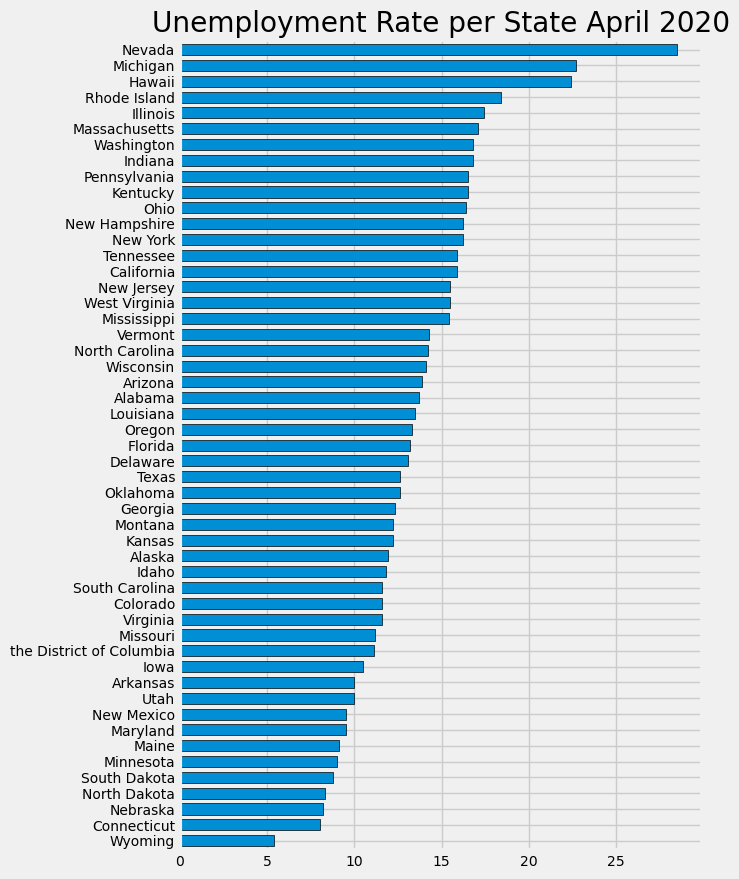

In [481]:
#getting april 2020 Unemployment Rate per State 
#T is for transforming the dataset (exchanging rows with columns)
plot_unemp_ap20 = unemp_states.loc[unemp_states.index == '2020-04-01'].T.\
    sort_values('2020-04-01').\
    plot(kind='barh', figsize = (6, 10), width=0.7, edgecolor="black", title='Unemployment Rate per State April 2020', fontsize=10)
plot_unemp_ap20.legend().remove()



In [486]:
#participation rate
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [487]:
# we now drop all indexes referring to various regions (North, South-West...) and Porto Rico ('PRUR')
cols_to_drop = []
for i in part_df.index:
    if len(i) == 7 and i!="CIVPART":
        part_df['title']=part_df['title'].str.replace('Labor Force Participation Rate for ', '')
    else:
        cols_to_drop.append(i)
part_df = part_df.title.drop(cols_to_drop)

In [488]:
all_results = []
for myid in part_df.index:
    result = fred.get_series(myid)
    result = result.to_frame(name=myid)
    time.sleep(0.1)
    all_results.append(result)
part_states=pd.concat(all_results, axis=1)


In [489]:
#unemp_states.isna().sum(axis=1).plot() to understand how many NaN
part_states = part_states.dropna()
part_id_to_state = part_df.to_dict()
part_states.columns=[part_id_to_state[c] for c in part_states.columns]


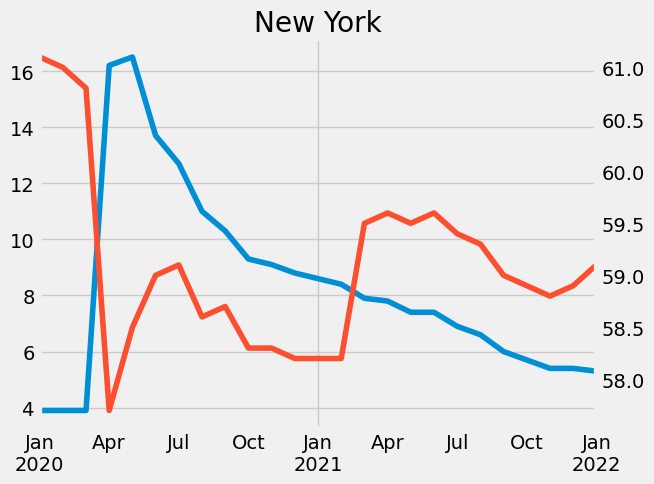

In [490]:
#Plotting unemployment vs participation for New york only
fig, ax = plt.subplots()
ax_2 = ax.twinx()
unemp_states.query('index >= 2020 and index <= 2022')['New York'].plot(ax=ax, label='Uneployment')
part_states.query('index >= 2020 and index <= 2022')['New York'].plot(ax=ax_2, label='Participation', color=color_pal[1])
ax.set_title('New York')
ax_2.grid(False)

IndexError: index 50 is out of bounds for axis 0 with size 50

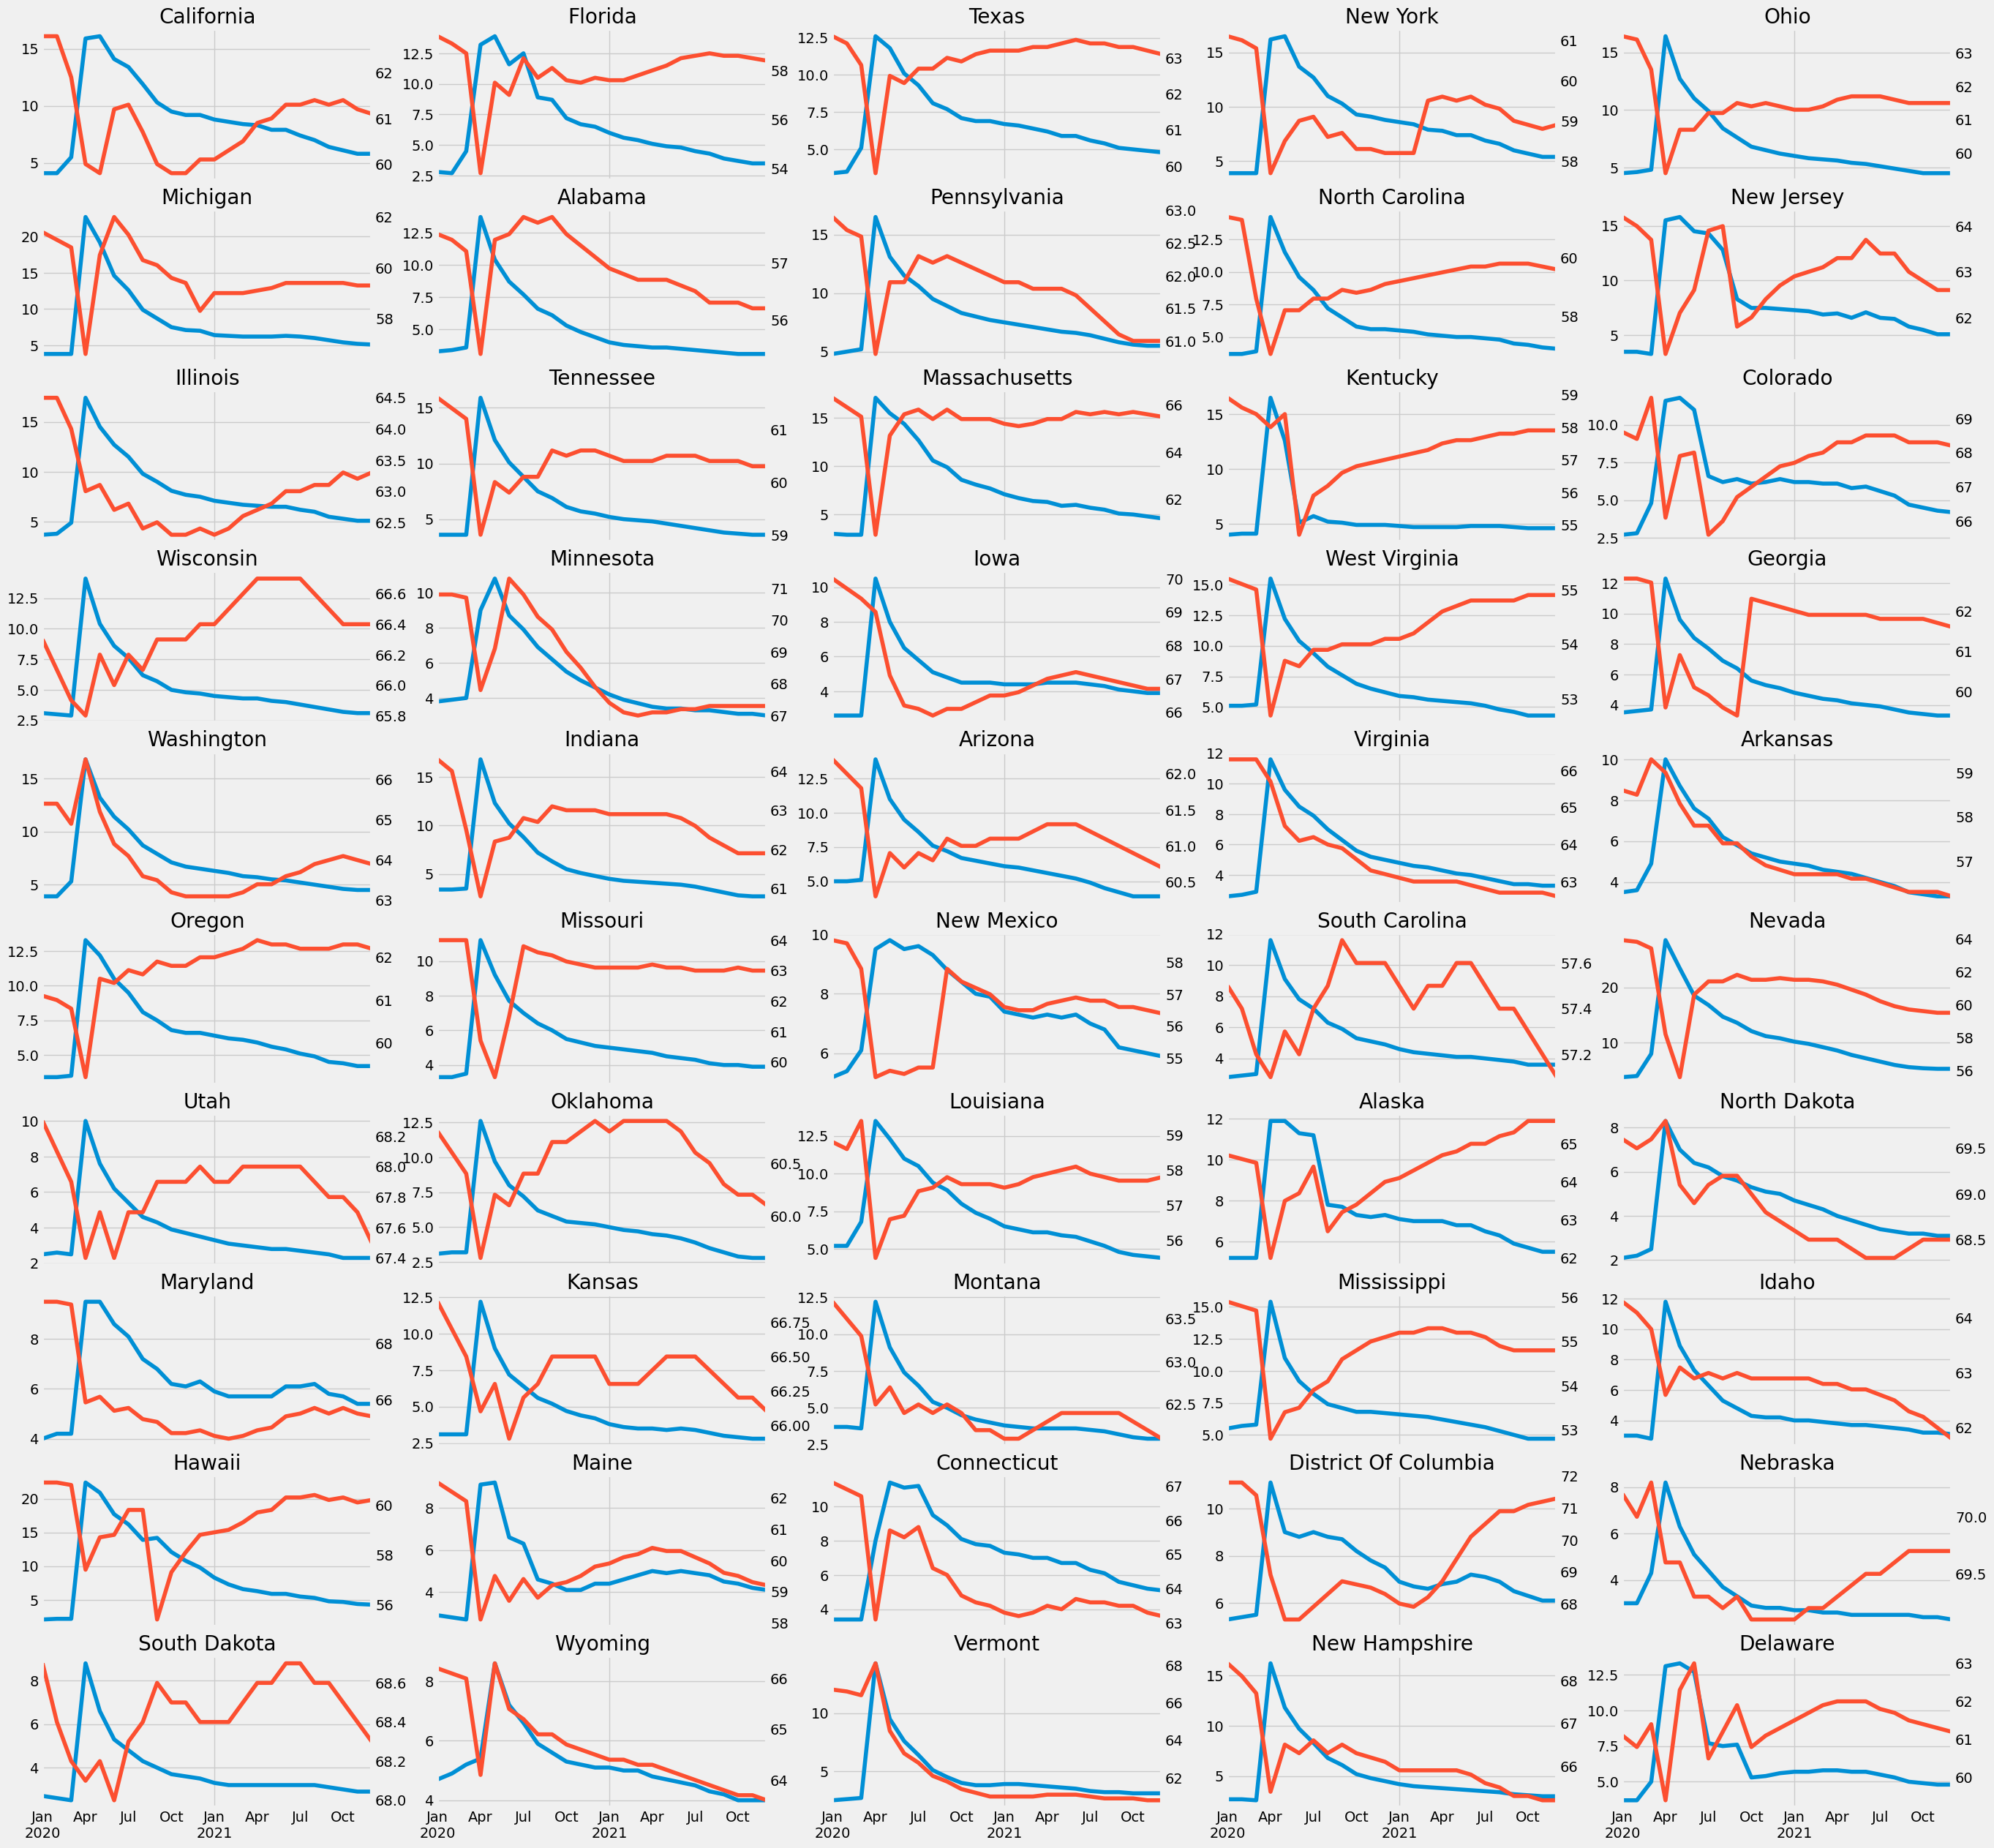

In [492]:
#Plotting unemployment vs participation for all states
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()
unemp_states=unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})
i=0
for state in unemp_states.columns:
    ax_2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Uneployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax_2, label='Participation', color=color_pal[1])
    axs[i].set_title(state)
    ax_2.grid(False)
    i+=1
plt.tight_layout()

plt.show()
    